In [2]:
import numpy as np
#import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import operator
import glob
import matplotlib.ticker as mticker
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from PIL import Image
import pandas as pd
import matplotlib.colors as colors
import matplotlib.cm as cm
import cartopy.crs as crs
import metpy.calc as mpcalc
from metpy.units import units
from pint import UnitRegistry
from metpy.plots import Hodograph, SkewT
import cartopy.crs as ccrs
import cartopy
from pyproj import Proj, transform
%matplotlib inline

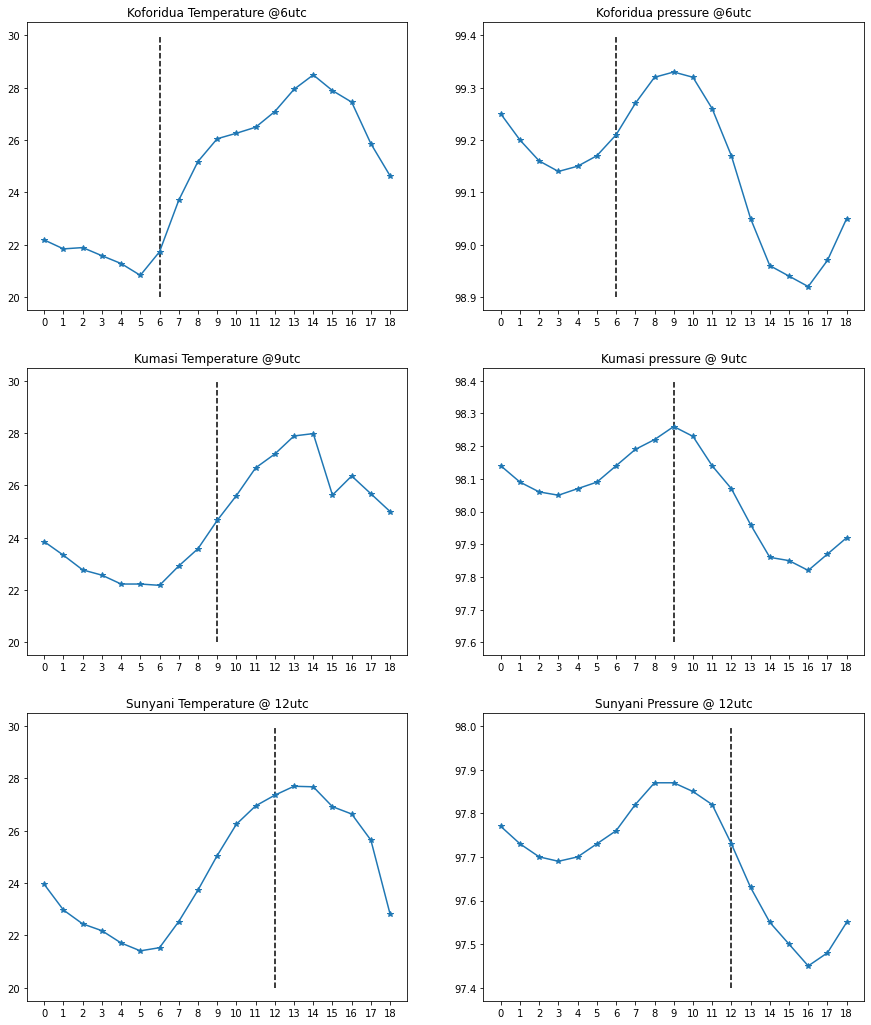

In [22]:
#col_names = ['Time', 'POS_SRH', 'NEG_SRH', 'TOT_SRH']
df = pd.read_csv('Koforidua.csv')
df1 = pd.read_csv("Kumasi.csv")
df2 = pd.read_csv("Sunyani.csv")
time = ["0","1","2","3","4","5","6","7","8","9","10","11","12","13", "14","15","16","17","18"]

# We will pull the data out of the example dataset into individual variables and
# assign units.
plt.figure(figsize=(15,18))
plt.subplot(3,2,1)
plt.plot(time,df['TMEAN'],marker='*')
plt.title('Koforidua Temperature @6utc')
plt.vlines("6", ymin=20, ymax=30, linestyles="--")


plt.subplot(3,2,2)

plt.plot(time,df['atmosphericpressure'],marker='*')
plt.title('Koforidua pressure @6utc')
plt.vlines("6", ymin=98.9, ymax=99.4, linestyles="--")

plt.subplot(3,2,3)
plt.plot(time,df1['TMEAN'],marker='*')
plt.title('Kumasi Temperature @9utc')
plt.vlines("9", ymin=20, ymax=30, linestyles="--")


plt.subplot(3,2,4)

plt.plot(time,df1['atmosphericpressure'],marker='*')
plt.title('Kumasi pressure @ 9utc')
plt.vlines("9", ymin=97.6, ymax=98.4, linestyles="--")

plt.subplot(3,2,5)
plt.plot(time,df2['TMEAN'],marker='*')
plt.title('Sunyani Temperature @ 12utc')
plt.vlines("12", ymin=20, ymax=30, linestyles="--")


plt.subplot(3,2,6)

plt.plot(time,df2['atmosphericpressure'],marker='*')
plt.title('Sunyani Pressure @ 12utc')
plt.vlines("12", ymin=97.4, ymax=98, linestyles="--")


#plt.ylabel('Speed (m/s)')
plt.savefig('Station_surface_temperature_pressure.pdf')
#plt.savefig('DRAFT_13th.png')

In [2]:
!ls

June_18_2018.ipynb		  SEVIRI_2018062609_ch5_WV_6.2.png
KNUST.csv			  SEVIRI_2018062612_ch5_WV_6.2.png
Koforidua.csv			  SEVIRI_2018062615_ch5_WV_6.2.png
Kumasi.csv			  SEVIRI_20180626.zip
SEVIRI_20180626			  Station_surface_temperature_pressure.pdf
SEVIRI_2018062603_ch5_WV_6.2.png  Sunyani.csv
SEVIRI_2018062606_ch5_WV_6.2.png  TAHMO_DATA.zip


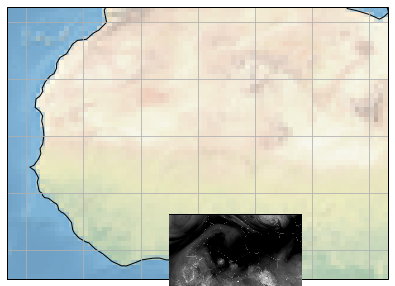

In [45]:
# Read image
lat = 4
lon = 5
img = Image.open('SEVIRI_2018062603_ch5_WV_6.2.png')
# Plot the map
fig = plt.figure(figsize=(10, 5))
extent = [-20, 20, 30, 3]
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(extent)
ax.gridlines()
ax.coastlines()
ax.stock_img()
# Use `zoom` to control the size of the image
imagebox = OffsetImage(img, zoom=0.1)
imagebox.image.axes = ax
ab = AnnotationBbox(imagebox, [lat, lon], pad=0, frameon=False)
ax.add_artist(ab)

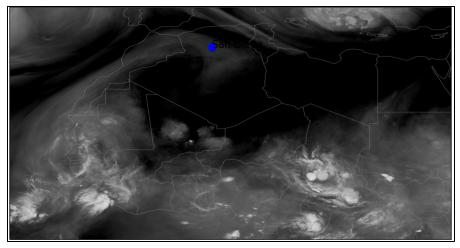

In [68]:
import os
import matplotlib.pyplot as plt

from cartopy import config
import cartopy.crs as ccrs


fig = plt.figure(figsize=(8, 12))

# get the path of the file. It can be found in the repo data directory.
fname = 'SEVIRI_2018062606_ch5_WV_6.2.png'
img_extent = (-20, 20, 24, 3)
img = plt.imread(fname)

ax = plt.axes(projection=ccrs.PlateCarree())

# set a margin around the data
ax.set_xmargin(0.05)
ax.set_ymargin(0.10)

# add the image. Because this image was a tif, the "origin" of the image is in the
# upper left corner
ax.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree())
#ax.coastlines(resolution='50m', color='black', linewidth=1)
ax.
# mark a known place to help us geo-locate ourselves
ax.plot(-1.61, 6.66, 'bo', markersize=7, transform=ccrs.PlateCarree())
ax.text(-1.61, 6.66, 'San Diego', transform=ccrs.PlateCarree())
plt.show()

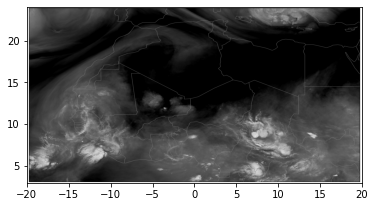

(900, 1350, 4)


In [72]:
f = plt.imread('SEVIRI_2018062606_ch5_WV_6.2.png')
img_extent = (-20, 20, 3, 24)

plt.imshow(f,extent=img_extent);
plt.show();
print(f.shape)

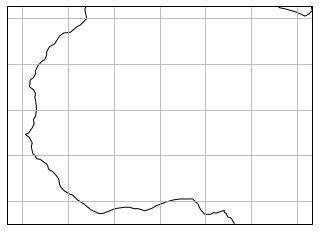

In [41]:
central_lon, central_lat = -10, 45
extent = [-20, 20, 30, 3]
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(extent)
ax.gridlines()
ax.coastlines()

In [2]:
###############Calculate virtual potential temperature########################
#1. First calculate mmr
#2. Extract for the stations at the various times (pressure, temperature, virtual temperature,
# specific_humidity, windspeed, winddxn, dewpoint)
#3. Calculate for the virtual potential temperature
#4. Plot the virtual potential temperature
#5. Calculate the dewpoint
#6. Extract the components for skewT at the stations
#7. Plot skewT

In [2]:
#First calculate the mixing ratio#
ds=xr.open_dataset('PRESSURE_DATA_FOR_COLD_POOL_GRAVITY_WAVE.nc')
MMR=mpcalc.mixing_ratio_from_specific_humidity(ds.q)
mixing_ratio=xr.DataArray(MMR,coords=[ds.time.values,
                                      ds.level.values,
                                         ds.latitude.values,
                                     ds.longitude.values],
                dims=['time','level','longitude','latitude'])



In [38]:
level=[1000,975,950,925,900,875,850,825,800,775,750,
       700,650,600,550,500,450,400,350,300,250,
       225,200,175,150,125,100]
for l in level:
    a=ds.u.sel(level=l,time='2018-06-26T12:00:00',longitude=-2.3123,latitude=7.3349, method='nearest').values * units('m/s').to('knots')
    b=ds.v.sel(level=l,time='2018-06-26T12:00:00',longitude=-2.3123,latitude=7.3349, method='nearest').values * units('m/s').to('knots')
    c=ds.u.sel(level=l,time='2018-06-26T12:00:00',longitude=-2.3123,latitude=7.3349, method='nearest').values * units('m/s')
    d=ds.v.sel(level=l,time='2018-06-26T12:00:00',longitude=-2.3123,latitude=7.3349, method='nearest').values
    temp=(ds.t.sel(level=l,time='2018-06-26T12:00:00',longitude=-2.3123,latitude=7.3349, method='nearest')).values
    mmr=mixing_ratio.sel(level=l,time='2018-06-26T12:00:00',longitude=-2.3123,latitude=7.3349, method='nearest').values
    q=ds.q.sel(level=l,time='2018-06-26T12:00:00',longitude=-2.3123,latitude=7.3349, method='nearest').values
    #print(l)
    #print("temperature is", temp)#
    #print("MMR is", mmr)#,
    #print("Specific", q)
   # print("wind direction is",mpcalc.wind_direction(c,c))
    print("wind speed is", mpcalc.wind_speed(c,c))
    #print(c,d)

wind speed is 1.7364206558548765 meter / second
wind speed is 2.4347352672672633 meter / second
wind speed is 2.829069442717496 meter / second
wind speed is 2.909466747888149 meter / second
wind speed is 2.7348882636224463 meter / second
wind speed is 0.21498283454518657 meter / second
wind speed is 2.0752148944492115 meter / second
wind speed is 4.906758694349085 meter / second
wind speed is 9.514717811942369 meter / second
wind speed is 13.94886433780109 meter / second
wind speed is 17.34549167193599 meter / second
wind speed is 23.147170585106714 meter / second
wind speed is 25.861562499123526 meter / second
wind speed is 26.004748493331768 meter / second
wind speed is 20.585152003923945 meter / second
wind speed is 14.929720632037291 meter / second
wind speed is 11.994042253298035 meter / second
wind speed is 9.03386070835891 meter / second
wind speed is 11.454991478689038 meter / second
wind speed is 13.262035248370104 meter / second
wind speed is 15.643349722324597 meter / second

In [6]:
df = pd.read_csv("Koforidua06.csv", delimiter=',')

# We will pull the data out of the example dataset into individual variables and
# assign units.

p = df['pressure'].values * units.hPa
T = ((df['temperature'].values)-273.15) * units('degC')
Tv = df['temperature'].values* units('kelvin')
Td = df['dewpoint'].values * units.degC
wind_speed = df['windspd'].values * units('knot')
wind_dir = df['wind_dxn'].values * units.degrees
uwind = df['u'].values * units('m/s').to('knot')
vwind = df['v'].values * units('m/s').to('knot')
q=df['q'].values
mmr=df['mmr'].values
heights = df['height'].values * units.hPa
thetav = df['thetav'].values* units('kelvin')
#dpt=mpcalc.dewpoint_from_specific_humidity(q,T,p)
#dpt
#thetav=mpcalc.virtual_potential_temperature(p,Tv,mmr,0.621980086)
#thetav
#q[0:19]

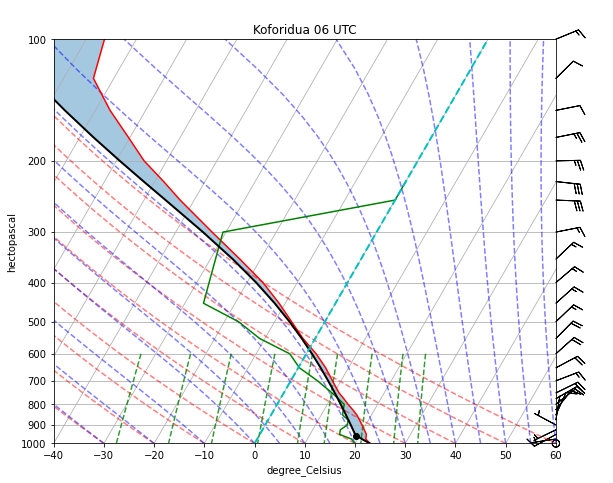

In [10]:
import pandas as pd
#Skew T and hodograph for T=1200
# Calculate the LCL
lcl_pressure, lcl_temperature = mpcalc.lcl(p[0], T[0], Td[0])
# Calculate the parcel profile.
parcel_prof = mpcalc.parcel_profile(p, T[0], Td[0])
# Create a new figure. The dimensions here give a good aspect ratio
fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig, rotation=30)

skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')
skew.plot_barbs(p, uwind, vwind)
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-40, 60)
plt.title('Koforidua 06 UTC')
# Plot LCL temperature as black dot
skew.plot(lcl_pressure, lcl_temperature, 'ko', markerfacecolor='black')
# Plot the parcel profile as a black line
skew.plot(p, parcel_prof, 'k', linewidth=2)
# Shade areas of CAPE and CIN
skew.shade_cin(p, T, parcel_prof)#Td is also an argument but its giving me errors
skew.shade_cape(p, T, parcel_prof)
# Plot a zero degree isotherm
skew.ax.axvline(0, color='c', linestyle='--', linewidth=2)
# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()
#plt.savefig('Koforidua_skew_wind.png')
#plt.savefig('Koforidua_skew_wind.pdf')
# Show the plot
plt.show()

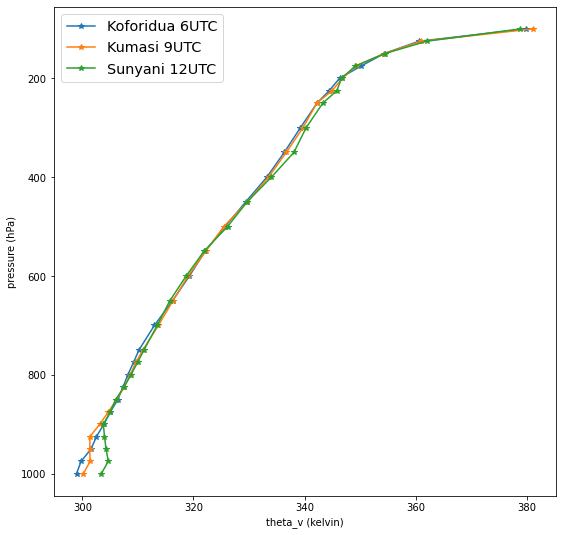

In [138]:
fig=plt.figure(figsize=(9,9))
df = pd.read_csv("Koforidua06.csv", delimiter=',')
df1 = pd.read_csv("Kumasi09.csv", delimiter=',')
df2 = pd.read_csv("Sunyani12.csv", delimiter=',')
thetav = df['thetav'].values* units('kelvin')
thetav1 = df1['thetav'].values* units('kelvin')
thetav2 = df2['thetav'].values* units('kelvin')
plt.plot(thetav,p,label='Koforidua 6UTC',marker='*')
plt.plot(thetav1,p,label='Kumasi 9UTC',marker='*')
plt.plot(thetav2,p,label='Sunyani 12UTC',marker='*')
plt.ylim(plt.ylim()[::-1])
plt.xlabel('theta_v (kelvin)')
plt.ylabel('pressure (hPa)')
plt.legend(fontsize='x-large')
plt.savefig('virtual_potential_temperature.png')
plt.savefig('virtual_potential_temperature.pdf')

In [2]:
ds=xr.open_dataset('PRESSURE_DATA_FOR_COLD_POOL_GRAVITY_WAVE.nc')
ds

<xarray.Dataset>
Dimensions:    (latitude: 37, level: 27, longitude: 57, time: 13)
Coordinates:
  * longitude  (longitude) float32 -9.0 -8.75 -8.5 -8.25 ... 4.25 4.5 4.75 5.0
  * latitude   (latitude) float32 12.0 11.75 11.5 11.25 ... 3.75 3.5 3.25 3.0
  * level      (level) int32 100 125 150 175 200 225 ... 900 925 950 975 1000
  * time       (time) datetime64[ns] 2018-06-26T06:00:00 ... 2018-06-26T18:00:00
Data variables:
    q          (time, level, latitude, longitude) float32 ...
    t          (time, level, latitude, longitude) float32 ...
    u          (time, level, latitude, longitude) float32 ...
    v          (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-10-15 11:37:06 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

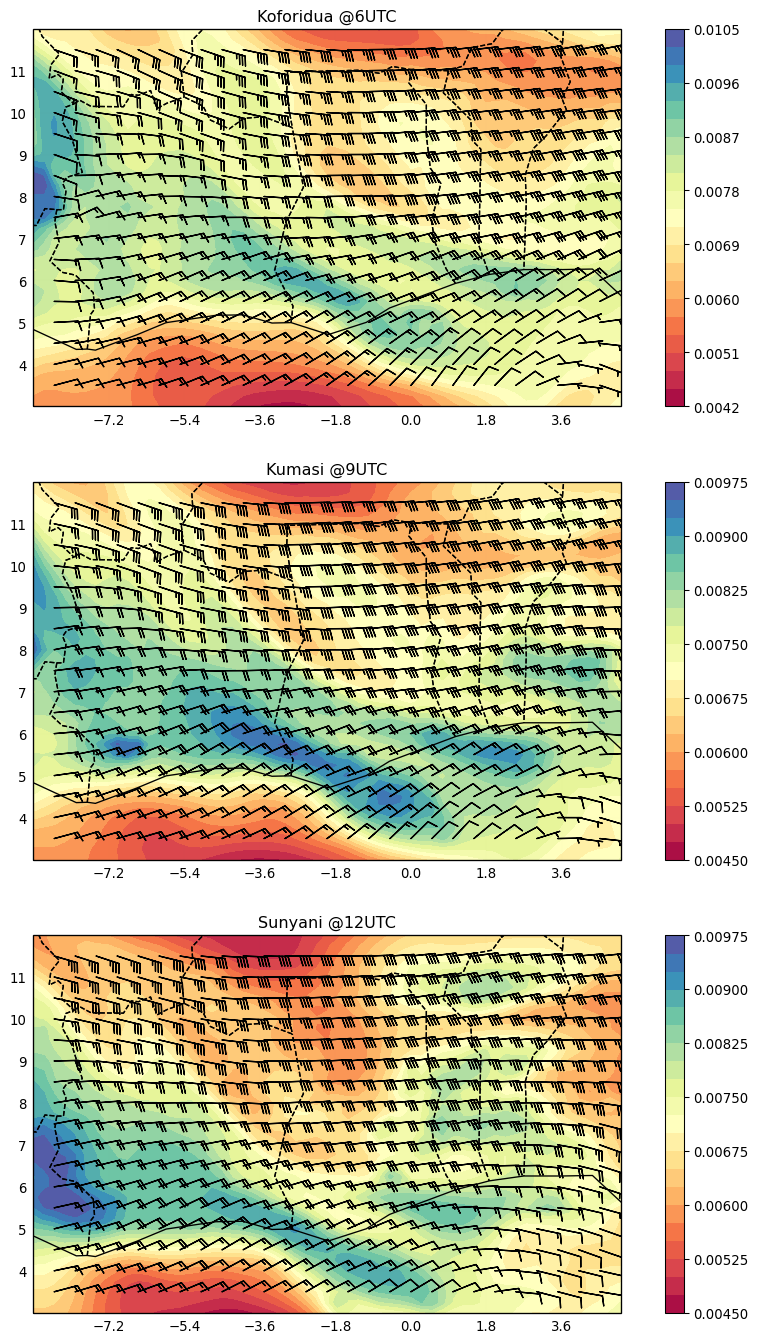

In [3]:
cmsize = [30,45]
fig = plt.figure(figsize=[x/2.54 for x in cmsize], dpi=96)
ax = fig.add_subplot(3,1,1, projection=ccrs.PlateCarree())
cf=plt.contourf(ds.longitude.sel(), ds.latitude.sel(),
           ds.q.sel(time='2018-06-26T06',level=700),20, transform=ccrs.PlateCarree(),cmap='Spectral')
#ax.streamplot(ds.longitude, ds.latitude, 
 #              ds.u.sel(time='2018-06-26T06',level=850), ds.v.sel(time='2018-06-26T06',level=850))
wind_slice = slice(2, -2, 2)
ax.barbs(ds.longitude[wind_slice], ds.latitude[wind_slice],
         ds.u.sel(time='2018-06-26T06',level=700).metpy.unit_array[wind_slice, wind_slice].to('knots'),
         ds.v.sel(time='2018-06-26T06',level=700).metpy.unit_array[wind_slice, wind_slice].to('knots'),
         length=6)
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='--')
ax.add_feature(cartopy.feature.BORDERS, linestyle='--')
gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.01, color='gray')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabels_bottom=True
ax.set_title('Koforidua @6UTC')
plt.colorbar()

ax = fig.add_subplot(3,1,2, projection=ccrs.PlateCarree())
cf=plt.contourf(ds.longitude.sel(), ds.latitude.sel(),
           ds.q.sel(time='2018-06-26T09',level=700),20, transform=ccrs.PlateCarree(),cmap='Spectral')
#ax.streamplot(ds.longitude, ds.latitude, 
 #              ds.u.sel(time='2018-06-26T06',level=850), ds.v.sel(time='2018-06-26T06',level=850))
wind_slice = slice(2, -2, 2)
ax.barbs(ds.longitude[wind_slice], ds.latitude[wind_slice],
         ds.u.sel(time='2018-06-26T09',level=700).metpy.unit_array[wind_slice, wind_slice].to('knots'),
         ds.v.sel(time='2018-06-26T09',level=700).metpy.unit_array[wind_slice, wind_slice].to('knots'),
         length=6)
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='--')
ax.add_feature(cartopy.feature.BORDERS, linestyle='--')
gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.01, color='gray')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabels_bottom=True
ax.set_title('Kumasi @9UTC')
plt.colorbar()

ax = fig.add_subplot(3,1,3, projection=ccrs.PlateCarree())
cf=plt.contourf(ds.longitude.sel(), ds.latitude.sel(),
           ds.q.sel(time='2018-06-26T12',level=700),20, transform=ccrs.PlateCarree(),cmap='Spectral')
#ax.streamplot(ds.longitude, ds.latitude, 
 #              ds.u.sel(time='2018-06-26T06',level=850), ds.v.sel(time='2018-06-26T06',level=850))
wind_slice = slice(2, -2, 2)
ax.barbs(ds.longitude[wind_slice], ds.latitude[wind_slice],
         ds.u.sel(time='2018-06-26T12',level=700).metpy.unit_array[wind_slice, wind_slice].to('knots'),
         ds.v.sel(time='2018-06-26T12',level=700).metpy.unit_array[wind_slice, wind_slice].to('knots'),
         length=6)
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='--')
ax.add_feature(cartopy.feature.BORDERS, linestyle='--')
gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.01, color='gray')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabels_bottom=True
ax.set_title('Sunyani @12UTC')
plt.colorbar()
plt.savefig('Winds700.png')
plt.savefig('Winds700.pdf')
plt.show()

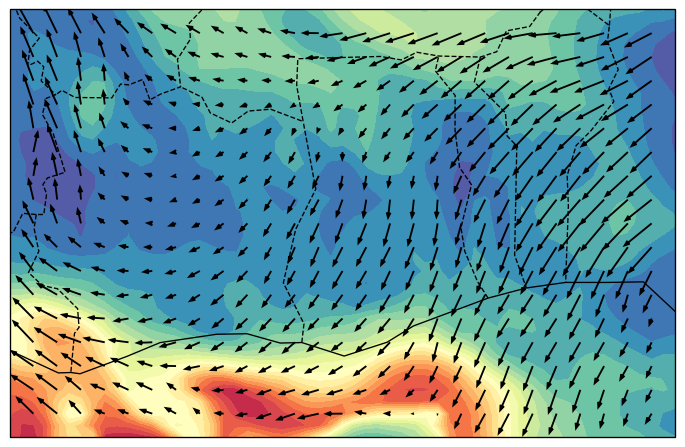

In [41]:
cmsize = [25,15]
fig = plt.figure(figsize=[x/2.54 for x in cmsize], dpi=96)
ax = plt.subplot(projection=ccrs.PlateCarree())
cf=plt.contourf(ds.longitude.sel(), ds.latitude.sel(),
           ds.q.sel(time='2018-06-26T06',level=850),20, transform=ccrs.PlateCarree(),cmap='Spectral')
u_wind850 = ds.u.sel(level=850).squeeze()
v_wind850 = ds.v.sel(level=850).squeeze()
wind_slice = slice(2, -2, 2)

ax.quiver(ds.longitude[wind_slice], ds.latitude[wind_slice],
                  u_wind850.sel(time='2018-06-26T06')[wind_slice, wind_slice],
                  v_wind850.sel(time='2018-06-26T06')[wind_slice, wind_slice],
                  headlength=4, headwidth=3, angles='xy', scale_units='xy',
                  scale=10, color='black', label='500-850mb shear')
#ax.streamplot(ds.longitude, ds.latitude, 
 #              ds.u.sel(time='2018-06-26T06',level=850), ds.v.sel(time='2018-06-26T06',level=850))
#ax.barbs(ds.longitude[wind_slice], ds.latitude[wind_slice],
 #        ds.u.sel(time='2018-06-26T06',level=850).metpy.unit_array[wind_slice, wind_slice].to('knots'),
  #       ds.v.sel(time='2018-06-26T06',level=850).metpy.unit_array[wind_slice, wind_slice].to('knots'),
   #      length=6)
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='--')
plt.show()

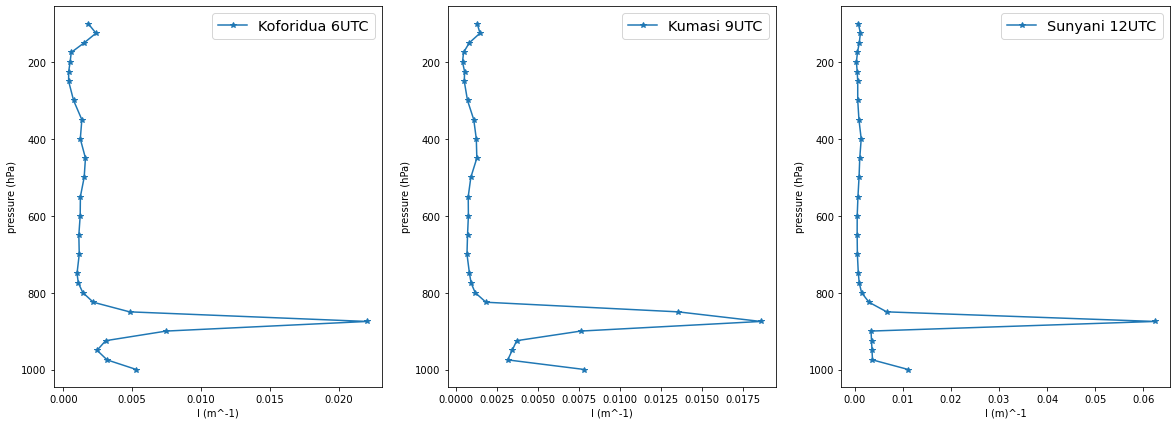

In [4]:
df = pd.read_csv("Koforidua06.csv", delimiter=',')
p = df['pressure'].values * units.hPa
uwind1=df['u'].values*units('m/s')
uwind = df['uwind_spd'].values * units('m/s')
heights = df['height'].values * units.meters
thetav = df['thetav'].values* units('kelvin')
N=mpcalc.brunt_vaisala_frequency(heights,thetav,axis=0)
I=N/uwind
fig=plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
plt.plot(I,p,label='Koforidua 6UTC',marker='*')
plt.ylim(plt.ylim()[::-1])
plt.xlabel('I (m^-1)')
plt.ylabel('pressure (hPa)')
plt.legend(fontsize='x-large')

############################################################
df = pd.read_csv("Kumasi09.csv", delimiter=',')
p = df['pressure'].values * units.hPa
uwind1=df['u'].values*units('m/s')
uwind = df['uwind_spd'].values * units('m/s')
heights = df['height'].values * units.meters
thetav = df['thetav'].values* units('kelvin')
N=mpcalc.brunt_vaisala_frequency(heights,thetav,axis=0)
I=N/uwind
s = pd.Series(I)
plt.subplot(1,3,2)
plt.plot(s.interpolate(),p,label='Kumasi 9UTC',marker='*')
plt.ylim(plt.ylim()[::-1])
plt.xlabel('I (m^-1)')
plt.ylabel('pressure (hPa)')
plt.legend(fontsize='x-large')

##########################################################
df = pd.read_csv("Sunyani12.csv", delimiter=',')
p = df['pressure'].values * units.hPa
uwind1=df['u'].values*units('m/s')
uwind = df['uwind_spd'].values * units('m/s')
heights = df['height'].values * units.meters
thetav = df['thetav'].values* units('kelvin')
N=mpcalc.brunt_vaisala_frequency(heights,thetav,axis=0)
I=N/uwind
s = pd.Series(I)
plt.subplot(1,3,3)
plt.plot(s.interpolate(),p,label='Sunyani 12UTC',marker='*')
plt.ylim(plt.ylim()[::-1])
plt.xlabel('I (m)^-1')
plt.ylabel('pressure (hPa)')
plt.legend(fontsize='x-large')
plt.savefig('Scorer_Parameter.png')
plt.savefig('Scorer_Parameter.pdf')

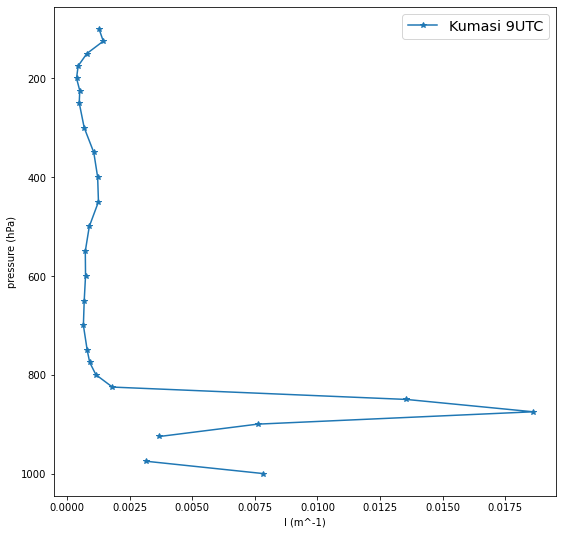

In [43]:
df = pd.read_csv("Kumasi09.csv", delimiter=',')
p = df['pressure'].values * units.hPa
uwind1=df['u'].values*units('m/s')
uwind = df['uwind_spd'].values * units('m/s')
heights = df['height'].values * units.meters
thetav = df['thetav'].values* units('kelvin')
N=mpcalc.brunt_vaisala_frequency(heights,thetav,axis=0)
I=N/uwind
fig=plt.figure(figsize=(9,9))
plt.plot(I,p,label='Kumasi 9UTC',marker='*')
plt.ylim(plt.ylim()[::-1])
plt.xlabel('I (m^-1)')
plt.ylabel('pressure (hPa)')
plt.legend(fontsize='x-large')


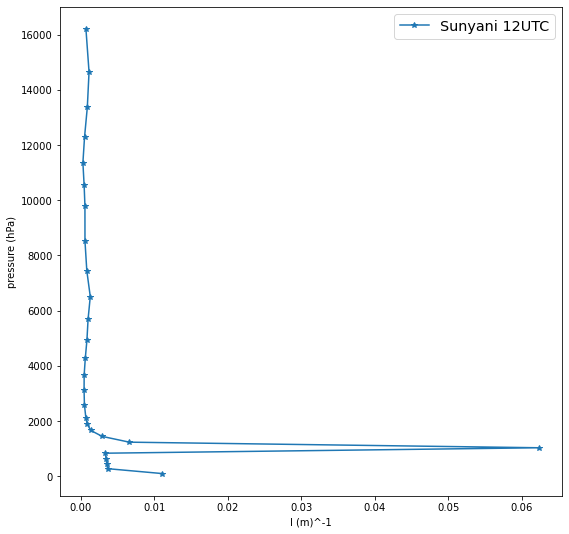

In [16]:
df = pd.read_csv("Sunyani12.csv", delimiter=',')
p = df['pressure'].values * units.hPa
uwind1=df['u'].values*units('m/s')
uwind = df['uwind_spd'].values * units('m/s')
heights = df['height'].values * units.meters
thetav = df['thetav'].values* units('kelvin')
N=mpcalc.brunt_vaisala_frequency(heights,thetav,axis=0)
I=N/uwind
s = pd.Series(I)
fig=plt.figure(figsize=(9,9))
plt.plot(s.interpolate(),heights,label='Sunyani 12UTC',marker='*')
#plt.ylim(plt.ylim()[::-1])
plt.xlabel('I (m)^-1')
plt.ylabel('pressure (hPa)')
plt.legend(fontsize='x-large')


In [90]:
####Added the jet term. Sunyani values might be quite high. But if i convert to m, then i square root, so the 
##values would be smaller. Continue with the zero line and the contribution of each also line
#ie, contribution of brunt only, jet term only and the total

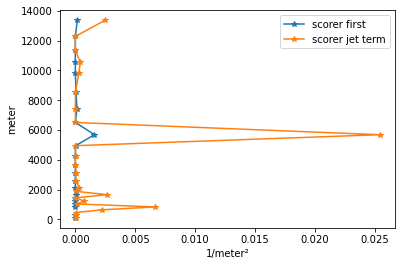

In [96]:
df = pd.read_csv("Sunyani12.csv", delimiter=',')
p = df['pressure'].values * units.hPa
uwind1=df['u'].values*units('m/s')
uwind = df['uwind_spd'].values * units('m/s')
heights = df['height'].values * units.meters
thetav = df['thetav'].values* units('kelvin')

######Calculate derivative
du=np.diff(uwind,n=2)
dz=np.diff(heights,n=2)
second=du/dz

speed_wave=12.3*units('m/s')
jet_term=(second**2)/((uwind[0:25]-speed_wave)**2)
jet_term
brunt=(N[0:25]**2)/(uwind[0:25]-speed_wave)**2
I=brunt-jet_term
#q=((I[0:25]-(second/uwind[0:25])
#plt.plot(I,heights[0:25],marker='*',label='scorer total')
plt.plot(brunt,heights[0:25],marker='*', label='scorer first')
plt.plot(jet_term,heights[0:25],marker='*',label='scorer jet term')
plt.legend()
###Why are they negatives?Why do i need to raise the second derivative by 2 again. is the derivative the same as difference 

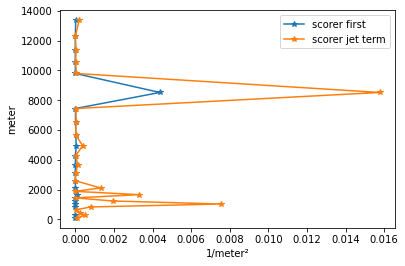

In [99]:
df = pd.read_csv("Kumasi09.csv", delimiter=',')
p = df['pressure'].values * units.hPa
uwind1=df['u'].values*units('m/s')
uwind = df['uwind_spd'].values * units('m/s')
heights = df['height'].values * units.meters
thetav = df['thetav'].values* units('kelvin')

######Calculate derivative
du=np.diff(uwind,n=2)
dz=np.diff(heights,n=2)
second=du/dz

speed_wave=12.3*units('m/s')
jet_term=(second**2)/((uwind[0:25]-speed_wave)**2)
jet_term
brunt=(N[0:25]**2)/(uwind[0:25]-speed_wave)**2
I=brunt-jet_term
#plt.plot(I,heights[0:25],marker='*',label='scorer total')
plt.plot(brunt,heights[0:25],marker='*', label='scorer first')
plt.plot(jet_term,heights[0:25],marker='*',label='scorer jet term')
plt.legend()
###Why are they negatives?Why do i need to raise the second derivative by 2 again. is the derivative the same as difference 

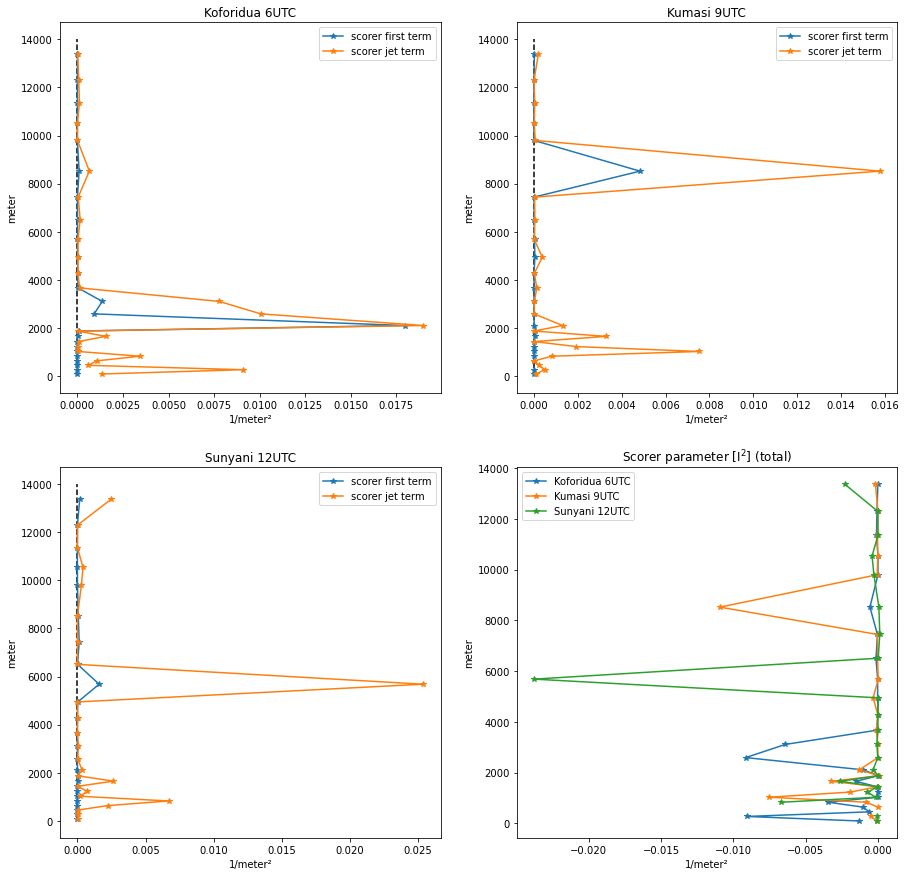

In [18]:
df = pd.read_csv("Koforidua06.csv", delimiter=',')
p = df['pressure'].values * units.hPa
uwind1=df['u'].values*units('m/s')
uwind = df['uwind_spd'].values * units('m/s')
heights = df['height'].values * units.meters
thetav = df['thetav'].values* units('kelvin')
N=mpcalc.brunt_vaisala_frequency(heights,thetav,axis=0)

######Calculate derivative
du=np.diff(uwind,n=2)
dz=np.diff(heights,n=2)
second=du/dz

speed_wave=12.3*units('m/s')
jet_term=(second**2)/((uwind[0:25]-speed_wave)**2)
jet_term
brunt=(N[0:25]**2)/(uwind[0:25]-speed_wave)**2
I1=brunt-jet_term
#plt.plot(I,heights[0:25],marker='*',label='scorer total')
fig=plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.plot(brunt,heights[0:25],marker='*', label='scorer first term')
plt.plot(jet_term,heights[0:25],marker='*',label='scorer jet term')
plt.vlines(x=0,ymin=0,ymax=14000,linestyle='--')
plt.title('Koforidua 6UTC')
plt.legend()
##################################################################################
df = pd.read_csv("Kumasi09.csv", delimiter=',')
p = df['pressure'].values * units.hPa
uwind1=df['u'].values*units('m/s')
uwind = df['uwind_spd'].values * units('m/s')
heights = df['height'].values * units.meters
thetav = df['thetav'].values* units('kelvin')
N=mpcalc.brunt_vaisala_frequency(heights,thetav,axis=0)

######Calculate derivative
du=np.diff(uwind,n=2)
dz=np.diff(heights,n=2)
second=du/dz

speed_wave=12.3*units('m/s')
jet_term=(second**2)/((uwind[0:25]-speed_wave)**2)
jet_term
brunt=(N[0:25]**2)/(uwind[0:25]-speed_wave)**2
I2=brunt-jet_term
plt.subplot(2,2,2)
#plt.plot(I,heights[0:25],marker='*',label='scorer total')
plt.plot(brunt,heights[0:25],marker='*', label='scorer first term')
plt.plot(jet_term,heights[0:25],marker='*',label='scorer jet term')
plt.vlines(x=0,ymin=0,ymax=14000,linestyle='--')
plt.title('Kumasi 9UTC')

plt.legend()
##############################################################################
df = pd.read_csv("Sunyani12.csv", delimiter=',')
p = df['pressure'].values * units.hPa
uwind1=df['u'].values*units('m/s')
uwind = df['uwind_spd'].values * units('m/s')
heights = df['height'].values * units.meters
thetav = df['thetav'].values* units('kelvin')
N=mpcalc.brunt_vaisala_frequency(heights,thetav,axis=0)

######Calculate derivative
du=np.diff(uwind,n=2)
dz=np.diff(heights,n=2)
second=du/dz

speed_wave=12.3*units('m/s')
jet_term=(second**2)/((uwind[0:25]-speed_wave)**2)
jet_term
brunt=(N[0:25]**2)/(uwind[0:25]-speed_wave)**2
I3=brunt-jet_term
#q=((I[0:25]-(second/uwind[0:25])
plt.subplot(2,2,3)

s = pd.Series(brunt)
plt.plot(s.interpolate(),heights[0:25],marker='*', label='scorer first term')
plt.plot(jet_term,heights[0:25],marker='*',label='scorer jet term')
plt.vlines(x=0,ymin=0,ymax=14000,linestyle='--')
plt.title('Sunyani 12UTC')
plt.legend()

plt.subplot(2,2,4)
plt.plot(I1,heights[0:25],marker='*',label='Koforidua 6UTC')
plt.plot(I2,heights[0:25],marker='*',label='Kumasi 9UTC')
plt.plot(I3,heights[0:25],marker='*',label='Sunyani 12UTC')
plt.title('Scorer parameter [I$^2$] (total)')
plt.legend()
plt.savefig('Scorer_total.png')
plt.savefig('Scorer_total.pdf')

###Why are they negatives?Why do i need to raise the second derivative by 2 again. is the derivative the same as difference 

[92.0 269.4 451.2 637.8 829.7 1026.9 1229.7 1438.7 1654.1 1876.38 2105.9 2588.8 3107.6 3667.9 4277.0 4944.1 5681.7 6506.1 7440.9 8519.9 9796.2 10533.7 11358.2 12292.9 13371.9 14648.2 16210.2] meter [-10.767000000000001 -7.465000000000001 -5.902000000000001 -7.752000000000001 -10.372 -11.655000000000001 -9.534 -6.973 -4.042000000000002 -1.4909999999999997 -0.0909999999999993 -0.4529999999999994 -0.3650000000000002 -2.1630000000000003 -2.3900000000000006 -4.041 -4.848 -3.5150000000000006 -5.317000000000001 -0.8770000000000007 10.488 9.745000000000001 6.73 5.954999999999998 -5.103000000000001] meter / second


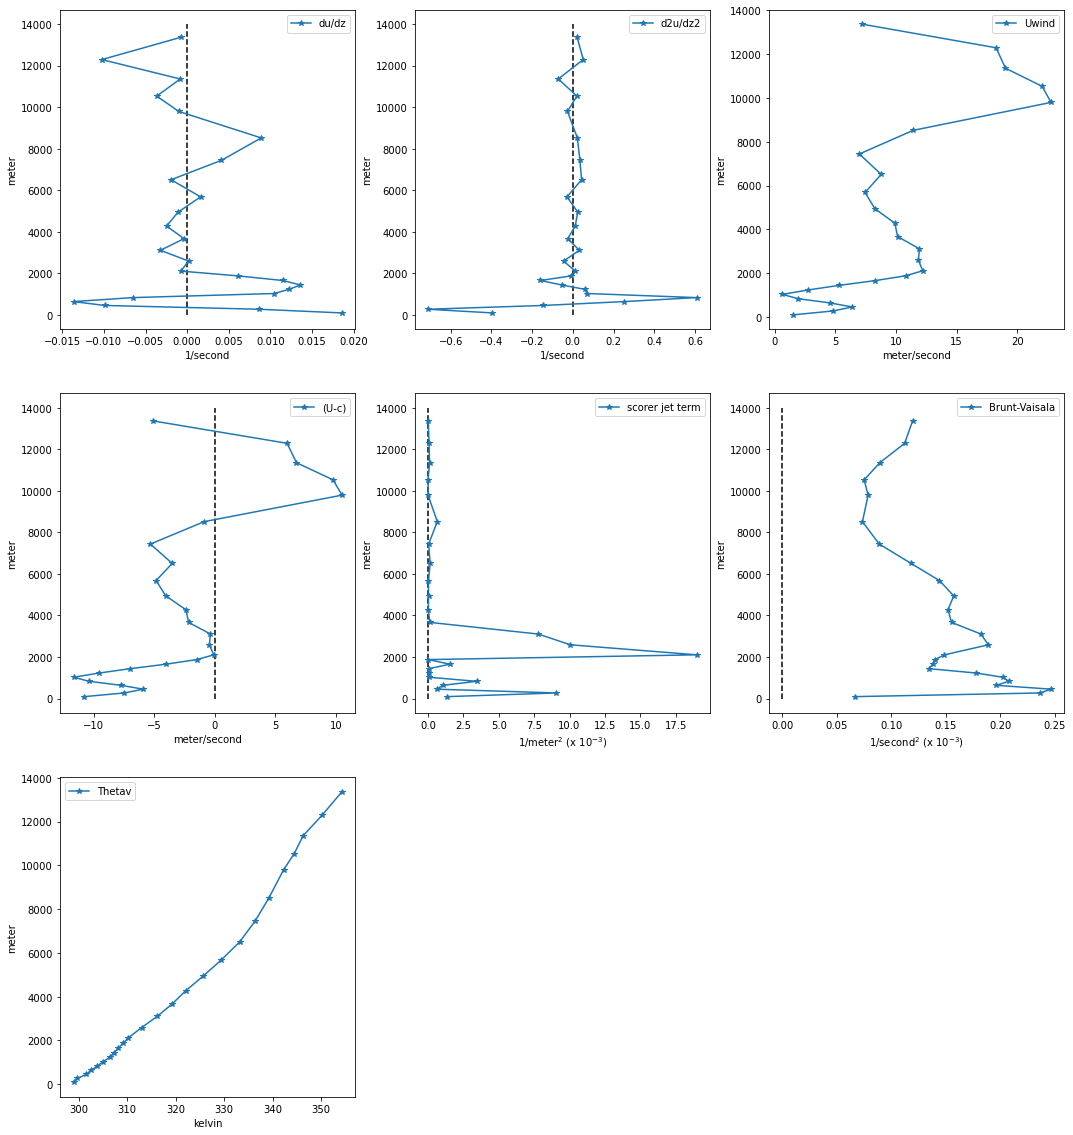

In [7]:
df = pd.read_csv("Koforidua06.csv", delimiter=',')
p = df['pressure'].values * units.hPa
uwind1=df['u'].values*units('m/s')
uwind = df['uwind_spd'].values * units('m/s')
heights = df['height'].values * units.meters
thetav = df['thetav'].values* units('kelvin')
N=mpcalc.brunt_vaisala_frequency(heights,thetav,axis=0)

######Calculate derivative
du=np.diff(uwind,n=2)
dz=np.diff(heights,n=2)
du1=np.diff(uwind,n=1)
dz1=np.diff(heights,n=1)
second=du/dz
first=du1/dz1
speed_wave=12.3*units('m/s')
jet_term=(second**2)/((uwind[0:25]-speed_wave)**2)
jet_term
brunt=(N[0:25]**2)/(uwind[0:25]-speed_wave)**2
I1=brunt-jet_term

#plot first derivative
fig=plt.figure(figsize=(18,20))
plt.subplot(3,3,1)
plt.plot(first[0:25],heights[0:25],marker='*', label='du/dz')
plt.vlines(x=0,ymin=0,ymax=14000,linestyle='--')
plt.legend()


plt.subplot(3,3,2)
plt.plot(second,heights[0:25],marker='*',label='d2u/dz2')
plt.vlines(x=0,ymin=0,ymax=14000,linestyle='--')
plt.legend()
#plt.suptitle('Koforidua 6UTC')

plt.subplot(3,3,3)
plt.plot(uwind[0:25],heights[0:25],marker='*',label='Uwind')
#plt.vlines(x=0,ymin=0,ymax=14000,linestyle='--')
plt.legend()

plt.subplot(3,3,4)
plt.plot((uwind[0:25]-speed_wave),heights[0:25],marker='*',label='(U-c)')
plt.vlines(x=0,ymin=0,ymax=14000,linestyle='--')
plt.legend()

plt.subplot(3,3,5)
plt.plot(jet_term*10**3,heights[0:25],marker='*',label='scorer jet term')
plt.vlines(x=0,ymin=0,ymax=14000,linestyle='--')
plt.xlabel('1/meter$^2$ (x 10$^{-3}$)')
plt.legend()

plt.subplot(3,3,6)
plt.plot((N[0:25]**2)*10**3,heights[0:25],marker='*',label='Brunt-Vaisala')
plt.vlines(x=0,ymin=0,ymax=14000,linestyle='--')
plt.xlabel('1/second$^2$ (x 10$^{-3}$)')
plt.legend()

plt.subplot(3,3,7)
plt.plot(thetav[0:25],heights[0:25],marker='*',label='Thetav')
#plt.vlines(x=0,ymin=0,ymax=14000,linestyle='--')
plt.legend()
########
#plt.savefig('Koforidua_terms_plots.pdf')
print(heights, (uwind[0:25]-speed_wave))

[92.0 269.4 451.2 637.8 829.7 1026.9 1229.7 1438.7 1654.1 1876.38 2105.9 2588.8 3107.6 3667.9 4277.0 4944.1 5681.7 6506.1 7440.9 8519.9 9796.2 10533.7 11358.2 12292.9 13371.9 14648.2 16210.2] meter [16.533 19.835 21.398 19.548000000000002 16.928 15.645 17.766 20.327 23.258 25.809 27.209000000000003 26.847 26.935000000000002 25.137 24.91 23.259 22.452 23.785 21.983 26.423000000000002 37.788 37.045 34.03 33.254999999999995 22.197] meter / second [6.610981036261283e-05 0.00023649954568472016 0.00024650029893693285 0.00019618356454715542 0.00020779217073868498 0.00020221128454414003 0.00017752196839098446 0.00013476738604982578 0.00013784046640679342 0.00013992208021104072 0.0001486998361578886 0.00018901758186540897 0.00018207249149713848 0.00015518250129073618 0.00015192505312186698 0.00015716581065884576 0.00014408501755996855 0.0001180796737074047 8.881316673496983e-05 7.337503145554322e-05 7.859357363662245e-05 7.495495939434534e-05 8.93232034544565e-05 0.00011212137767781953 0.000119

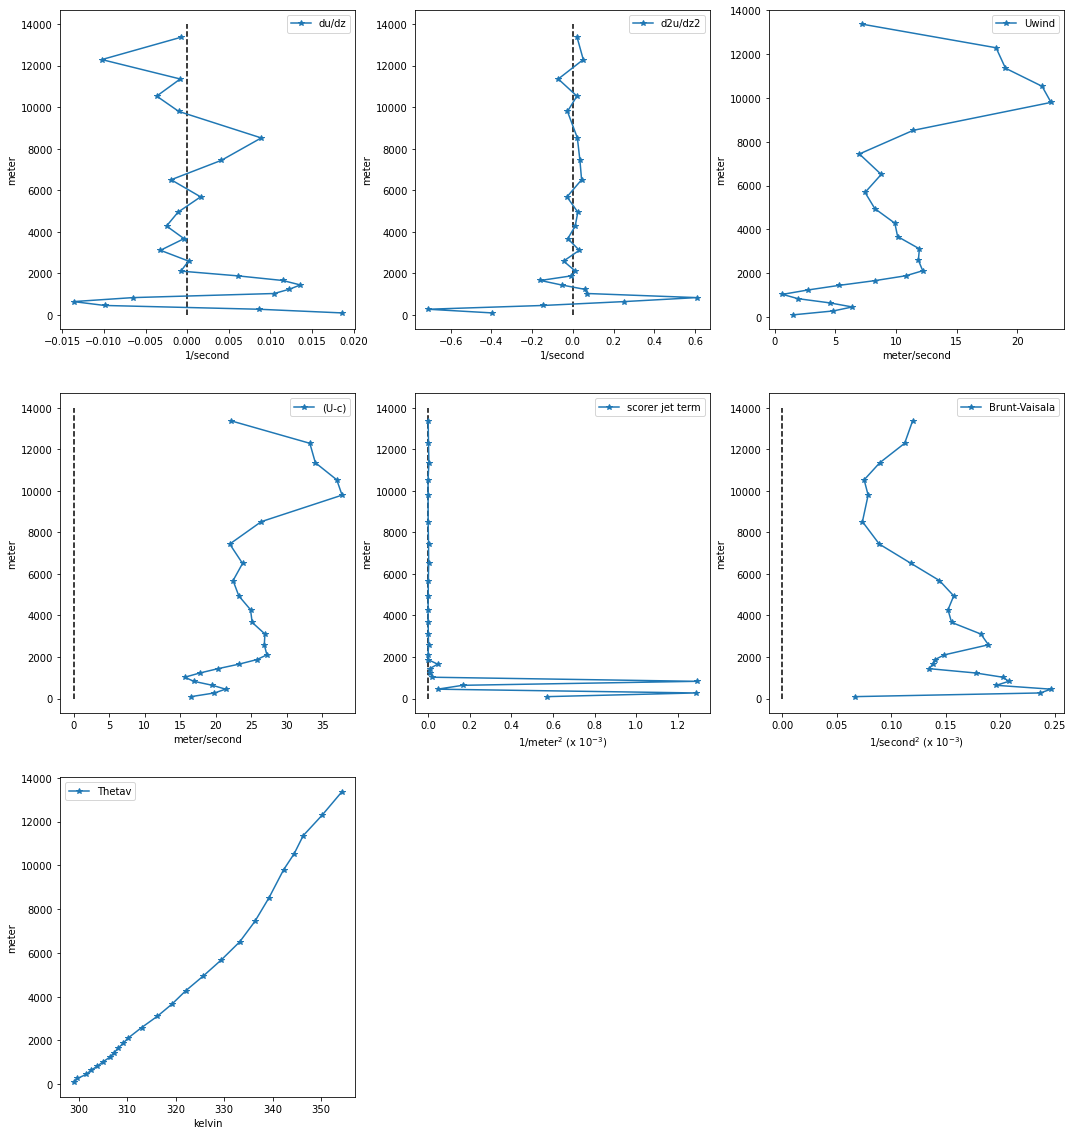

In [27]:
df = pd.read_csv("Koforidua06.csv", delimiter=',')
p = df['pressure'].values * units.hPa
uwind1=df['u'].values*units('m/s')
uwind = df['uwind_spd'].values * units('m/s')
heights = df['height'].values * units.meters
thetav = df['thetav'].values* units('kelvin')
N=mpcalc.brunt_vaisala_frequency(heights,thetav,axis=0)

######Calculate derivative
du=np.diff(uwind,n=2)
dz=np.diff(heights,n=2)
du1=np.diff(uwind,n=1)
dz1=np.diff(heights,n=1)
second=du/dz
first=du1/dz1
speed_wave=-15*units('m/s')
jet_term=(second**2)/((uwind[0:25]-speed_wave)**2)
jet_term
brunt=(N[0:25]**2)/(uwind[0:25]-speed_wave)**2
I1=brunt-jet_term

#plot first derivative
fig=plt.figure(figsize=(18,20))
plt.subplot(3,3,1)
plt.plot(first[0:25],heights[0:25],marker='*', label='du/dz')
plt.vlines(x=0,ymin=0,ymax=14000,linestyle='--')
plt.legend()


plt.subplot(3,3,2)
plt.plot(second,heights[0:25],marker='*',label='d2u/dz2')
plt.vlines(x=0,ymin=0,ymax=14000,linestyle='--')
plt.legend()
#plt.suptitle('Koforidua 6UTC')

plt.subplot(3,3,3)
plt.plot(uwind[0:25],heights[0:25],marker='*',label='Uwind')
#plt.vlines(x=0,ymin=0,ymax=14000,linestyle='--')
plt.legend()

plt.subplot(3,3,4)
plt.plot((uwind[0:25]-speed_wave),heights[0:25],marker='*',label='(U-c)')
plt.vlines(x=0,ymin=0,ymax=14000,linestyle='--')
plt.legend()

plt.subplot(3,3,5)
plt.plot(jet_term*10**3,heights[0:25],marker='*',label='scorer jet term')
plt.vlines(x=0,ymin=0,ymax=14000,linestyle='--')
plt.xlabel('1/meter$^2$ (x 10$^{-3}$)')
plt.legend()

plt.subplot(3,3,6)
plt.plot((N[0:25]**2)*10**3,heights[0:25],marker='*',label='Brunt-Vaisala')
plt.vlines(x=0,ymin=0,ymax=14000,linestyle='--')
plt.xlabel('1/second$^2$ (x 10$^{-3}$)')
plt.legend()

plt.subplot(3,3,7)
plt.plot(thetav[0:25],heights[0:25],marker='*',label='Thetav')
#plt.vlines(x=0,ymin=0,ymax=14000,linestyle='--')
plt.legend()
########
#plt.savefig('Koforidua_terms_plots.pdf')
print(heights, (uwind[0:25]-speed_wave),mpcalc.brunt_vaisala_frequency_squared(heights,thetav,axis=0))


In [15]:
df = pd.read_csv("Koforidua06.csv", delimiter=',')
p = df['pressure'].values * units.hPa
uwind1=df['u'].values*units('m/s')
uwind = df['uwind_spd'].values * units('m/s')
heights = df['height'].values * units.meters
thetav = df['thetav'].values* units('kelvin')
N=mpcalc.brunt_vaisala_frequency(heights,thetav,axis=0)

######Calculate derivative
du=np.diff(uwind,n=2)
dz=np.diff(heights,n=2)
du1=np.diff(uwind,n=1)
dz1=np.diff(heights,n=1)
second=du/dz
first=du1/dz1

speed_wave=12.3*units('m/s')
jet_term=(second**2)/((uwind[0:25]-speed_wave)**2)
jet_term
brunt=(N[0:25]**2)/(uwind[0:25]-speed_wave)**2
I1=brunt-jet_term

first=mpcalc.smooth_n_point(second, 5)
#plot first derivative
fig=plt.figure(figsize=(18,20))
plt.subplot(3,3,1)
plt.plot(first[0:25],heights[0:25],marker='*', label='du/dz')
plt.vlines(x=0,ymin=0,ymax=14000,linestyle='--')
plt.legend()

plt.show

IndexError: too many indices for array

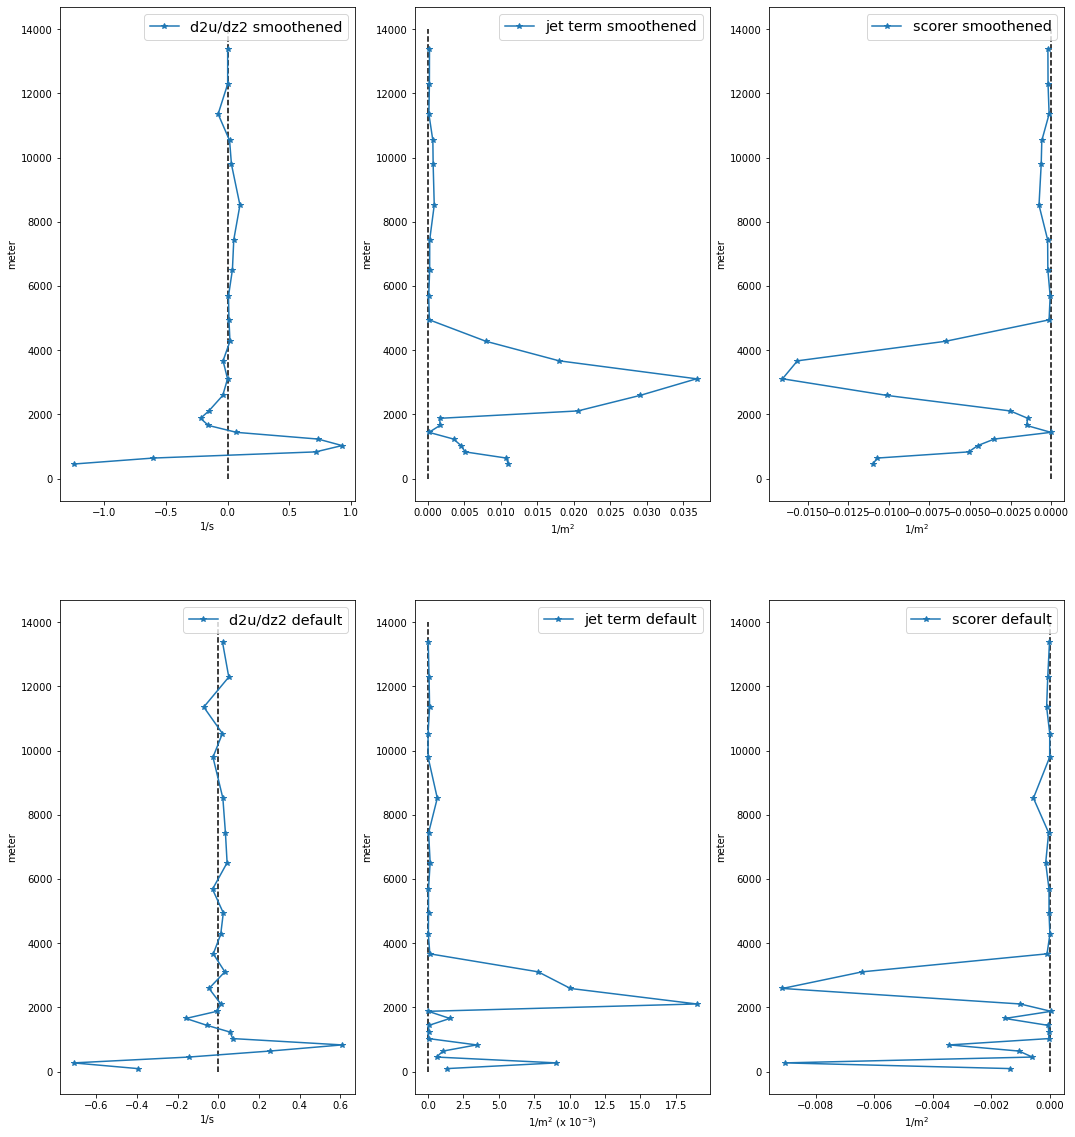

In [77]:
df = pd.read_csv("Koforidua06.csv", delimiter=',')
p = df['pressure'].values * units.hPa
uwind1=df['u'].values*units('m/s')
uwind = df['uwind_spd'].values * units('m/s')
heights = df['height'].values * units.meters
thetav = df['thetav'].values* units('kelvin')
second=df['second'].values*units('1/s')
jet=df['jet'].values*units('1/m**2')
df['mov_avg'] = df['second'].rolling(3).sum()
df['jetty'] = df['jet'].rolling(3).sum()
jet=df['scorer'].values*units('1/m**2')
df['score'] = df['scorer'].rolling(3).sum()

du=np.diff(uwind,n=2)
dz=np.diff(heights,n=2)
du1=np.diff(uwind,n=1)
dz1=np.diff(heights,n=1)
second=du/dz
first=du1/dz1
speed_wave=12.3*units('m/s')
jet_term=(second**2)/((uwind[0:25]-speed_wave)**2)
#jet_term
brunt=(N[0:25]**2)/(uwind[0:25]-speed_wave)**2
I1=brunt-jet_term


fig=plt.figure(figsize=(18,20))
plt.subplot(2,3,1)
plt.plot(df['mov_avg'][0:25],heights[0:25],marker='*', label='d2u/dz2 smoothened')
plt.vlines(x=0,ymin=0,ymax=14000,linestyle='--')
plt.xlabel('1/s')
plt.legend(fontsize='x-large')

plt.subplot(2,3,2)
plt.plot(df['jetty'][0:25],heights[0:25],marker='*', label='jet term smoothened')
plt.vlines(x=0,ymin=0,ymax=14000,linestyle='--')
plt.xlabel('1/m$^2$')
plt.legend(fontsize='x-large')

plt.subplot(2,3,3)
plt.plot(df['score'][0:25],heights[0:25],marker='*', label='scorer smoothened')
plt.vlines(x=0,ymin=0,ymax=14000,linestyle='--')
plt.xlabel('1/m$^2$')
plt.legend(fontsize='x-large')

plt.subplot(2,3,4)
plt.plot(second,heights[0:25],marker='*',label='d2u/dz2 default')
plt.vlines(x=0,ymin=0,ymax=14000,linestyle='--')
plt.xlabel('1/s')
plt.legend(fontsize='x-large')


plt.subplot(2,3,5)
plt.plot(jet_term*10**3,heights[0:25],marker='*',label='jet term default')
plt.vlines(x=0,ymin=0,ymax=14000,linestyle='--')
plt.xlabel('1/m$^2$ (x 10$^{-3}$)')
plt.legend()
plt.legend(fontsize='x-large')

plt.subplot(2,3,6)
plt.plot(I1,heights[0:25],marker='*',label='scorer default')
plt.vlines(x=0,ymin=0,ymax=14000,linestyle='--')
plt.xlabel('1/m$^2$')
plt.legend(fontsize='x-large')
plt.savefig('Updated_smoothened_profile.pdf')
plt.savefig('Updated_smoothened_profile.png')

In [49]:
I1

array([-1.34685407e-03, -9.06832918e-03, -5.98865833e-04, -1.05570509e-03,
       -3.43268322e-03, -3.55877783e-05, -3.48169660e-05, -5.99692397e-05,
       -1.53852953e-03,  4.11879784e-05, -1.01700878e-03, -9.14336907e-03,
       -6.41240369e-03, -9.56712740e-05,  1.50646862e-06, -2.75983675e-05,
       -2.81788216e-05, -1.42101294e-04, -4.04349214e-05, -5.61184092e-04,
       -5.48551664e-06, -3.56151025e-06, -1.10146274e-04, -7.17333636e-05,
       -1.23393995e-05]) <Unit('1 / meter ** 2')>

In [5]:
ds=xr.open_dataset('adaptor.mars.internal-1605986679.8628864-8604-28-055439de-94bd-4f3b-8aef-d5e64d080700.nc')

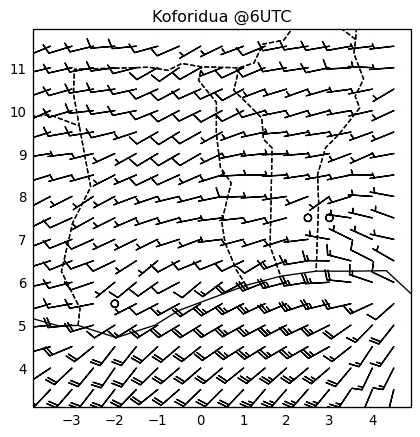

In [8]:
cmsize = [30,45]
fig = plt.figure(figsize=[x/2.54 for x in cmsize], dpi=96)
ax = fig.add_subplot(3,1,1, projection=ccrs.PlateCarree())
#cf=plt.contourf(ds.longitude.sel(), ds.latitude.sel(),
 #          ds.q.sel(time='2018-06-26T06',level=700),20, transform=ccrs.PlateCarree(),cmap='Spectral')
#ax.streamplot(ds.longitude, ds.latitude, 
 #              ds.u.sel(time='2018-06-26T06',level=850), ds.v.sel(time='2018-06-26T06',level=850))
wind_slice = slice(2, -2, 2)
ax.barbs(ds.longitude[wind_slice], ds.latitude[wind_slice],
         ds.u.sel(time='2018-06-18T12').metpy.unit_array[wind_slice, wind_slice].to('knots'),
         ds.v.sel(time='2018-06-18T12').metpy.unit_array[wind_slice, wind_slice].to('knots'),
         length=6)
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='--')
ax.add_feature(cartopy.feature.BORDERS, linestyle='--')
gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.01, color='gray')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabels_bottom=True
ax.set_title('Koforidua @6UTC')
#plt.colorbar()
plt.show()

<xarray.Dataset>
Dimensions:    (latitude: 37, longitude: 37, time: 1)
Coordinates:
  * longitude  (longitude) float32 -4.0 -3.75 -3.5 -3.25 ... 4.25 4.5 4.75 5.0
  * latitude   (latitude) float32 12.0 11.75 11.5 11.25 ... 3.75 3.5 3.25 3.0
  * time       (time) datetime64[ns] 2018-06-18T12:00:00
Data variables:
    u          (time, latitude, longitude) float32 3.32698 ... 1.5145469
    v          (time, latitude, longitude) float32 2.7881212 ... 10.470589
Attributes:
    Conventions:  CF-1.6
    history:      2020-11-21 19:24:41 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

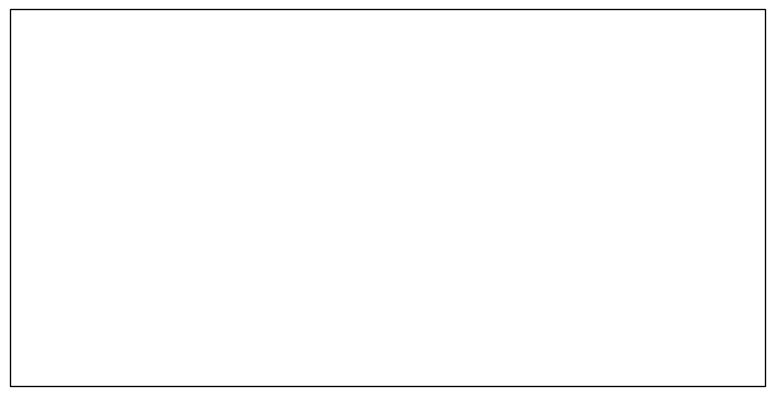

In [7]:
ds

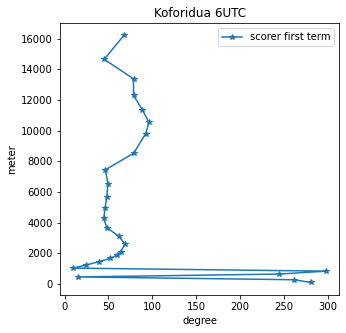

In [3]:
df = pd.read_csv("Koforidua06.csv", delimiter=',')
udxn = df['wind_dxn'].values * units('degrees')
heights = df['height'].values * units.meters

fig=plt.figure(figsize=(5,5))
plt.subplot(1,1,1)
plt.plot(udxn,heights,marker='*', label='scorer first term')
plt.title('Koforidua 6UTC')
plt.legend()
########

In [12]:
###all calculations are done at the near surface level 975 hpa or 269m

0.00023649954568472016

In [20]:
m=(2*np.pi)/4000
m2=m**2
m2

2.4674011002723398e-06

In [42]:
k2=(m2*((-20)**2))/(2.36*10**-4)
k=np.sqrt(k2)
k,k2

(2.045002631581059, 4.182035763173458)

In [43]:
lmbda=(2*np.pi)/k
lmbda

3.072458299147443

In [45]:
(m2*((-20)**2))

0.0009869604401089359

In [46]:
np.divide(0.0009869604401089359,2.36*10**-4)

4.182035763173458

In [ ]:
6.